In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

### 將 Titanic 資料讀入

In [4]:
data = pd.read_csv("dataset/titanicTrain.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
pclass       1000 non-null int64
survived     1000 non-null int64
name         1000 non-null object
sex          1000 non-null object
age          861 non-null float64
sibsp        1000 non-null int64
parch        1000 non-null int64
ticket       1000 non-null object
fare         1000 non-null float64
cabin        283 non-null object
embarked     998 non-null object
boat         417 non-null object
body         95 non-null float64
home.dest    742 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 109.5+ KB


In [6]:
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


說明各欄位的意義：
- pclass: 艙等
- survived: 生存與否，存活為1
- name: 乘客姓名
- sex: 乘客性別
- age: 乘客年齡
- sibsp: 兄弟姊妹+配偶人數 (Sibling aand Spouse)
- parch: 父母+子女人數 (Parent and Children)
- ticket: 船票編號
- fare: 票價
- cabin: 船艙號碼
- embarked: 出發地
- boat: 所乘救生艇的編號
- body: 遺體編號 Body Identification Number
- home.dest: 家鄉/目的地 (Home/Destination)

想知道更詳細的資訊可以參考此網站：http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt

## 探索性資料分析 (Explorative Data Analysis, EDA)

In [108]:
# A function for getting colors from built-in colormap
def get_colors(colormap, n):
    color_cood = np.linspace(0, 1, n)
    colors = [plt.get_cmap(colormap)(i) for i in color_cood]
    return colors

#### 應變數 Survived 

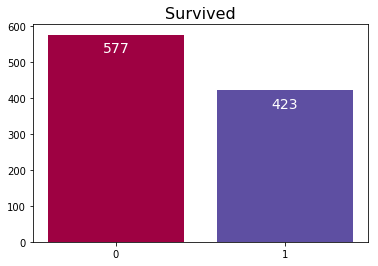

In [126]:
survived_count = data.groupby('survived')['name'].count()
plt.bar(x =[str(i) for i in survived_count.index],
        height = survived_count.values, 
        color = get_colors('Spectral', 2))
for i, val, c in zip(survived_count.index, survived_count.values, tcolor):
    plt.annotate(str(val),
                 xy = (i, val-50),
                 horizontalalignment = 'center',
                 fontsize = 14,
                 color = 'white')
plt.title("Survived", fontsize=16)
plt.show()

#### 自變數 pclass

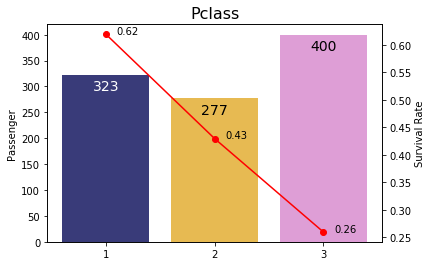

In [197]:
pclass_count = data.groupby('pclass').size()
pclass_survived = data.groupby(['pclass', 'survived']).size()[1::2]
pclass_survived_rate = [i/j  for i, j in zip(pclass_survived, pclass_count)]

fig, ax = plt.subplots()
ax.bar(x =[str(i) for i in pclass_count.index],
        height = pclass_count.values,
        color = get_colors('tab20b', 3))
ax.set_ylabel('Passenger')

tcolor = ['white', 'black', 'black']
for i, val, c in zip(pclass_count.index, pclass_count.values, tcolor):
    plt.annotate(str(val),
                 xy = (i-1, val-30),
                 horizontalalignment = 'center',
                 fontsize = 14,
                 color = c)

ax2 = ax.twinx()
ax2.set_ylabel('Survival Rate')
ax2.plot(pclass_survived_rate, marker='o', color='red')
for i, val in zip(pclass_count.index, pclass_survived_rate):
    ax2.annotate("%.2f"%(val),
                 xy = (i-1+0.2, val),
                 horizontalalignment = 'center')

plt.title("Pclass", fontsize=16)
plt.show()

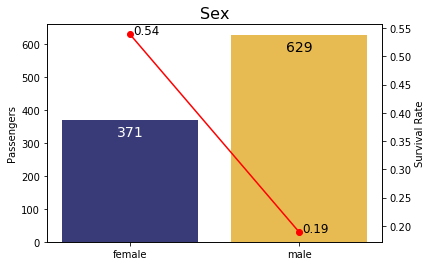

In [209]:
sex_count = data.groupby('sex').size()
sex_survived = data.groupby(['pclass', 'survived']).size()[1::2]
sex_survived_rate = [i/j  for i, j in zip(sex_survived, sex_count)]

fig, ax = plt.subplots()
ax.bar(x = sex_count.index,
       height = sex_count.values,
       color = get_colors('tab20b', 3)[0:2])
ax.set_ylabel('Passengers')

tcolor = ['white', 'black']
for i, c in zip(range(len(sex_count.index)), tcolor):
    plt.annotate(sex_count.values[i],
                 xy = (i, sex_count.values[i]-50),
                 horizontalalignment = 'center',
                 fontsize = 14,
                 color = c)

ax2 = ax.twinx()
ax2.set_ylabel('Survival Rate')
ax2.plot(sex_survived_rate, marker='o', color='red')
for i, val in zip(range(len(sex_count.index)), sex_survived_rate):
    ax2.annotate("%.2f"%(val),
                 xy = (i+0.1, val),
                 horizontalalignment = 'center',
                 fontsize = 12)

plt.title("Sex", fontsize=16)
plt.show()

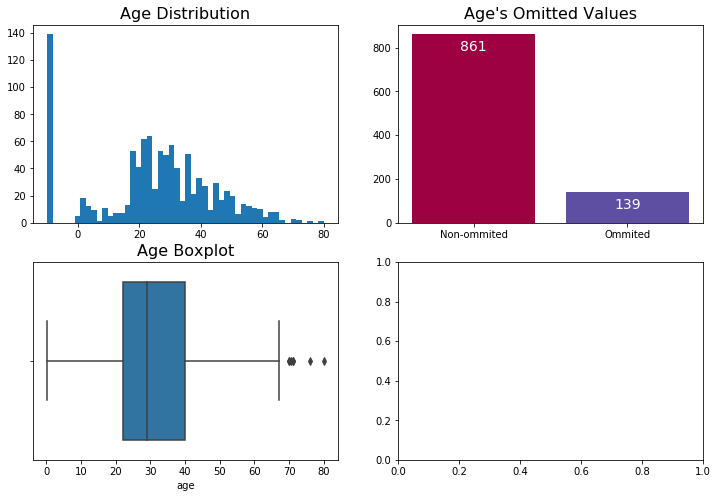

In [163]:
age = data['age'].fillna(-10) # since there are NaNs in age column
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].hist(x=age, bins=50)
ax[0, 0].set_title("Age Distribution", fontsize=16) 

ax[0, 1].bar(x=['Non-ommited', 'Ommited'], height=[len(age[age>0]), 1000-len(age[age>0])], color=get_colors('Spectral', 2))
ax[0, 1].annotate(str(len(age[age>0])), xy=(0, len(age[age>0])-75), horizontalalignment='center', fontsize=14, color='white')
ax[0, 1].annotate(str(1000-len(age[age>0])), xy=(1, 1000-len(age[age>0])-75), horizontalalignment='center', fontsize=14, color='white')
ax[0, 1].set_title("Age's Omitted Values", fontsize=16)

sns.boxplot(age[age>0], ax=ax[1, 0])
ax[1, 0].set_title("Age Boxplot", fontsize=16) 
plt.show()

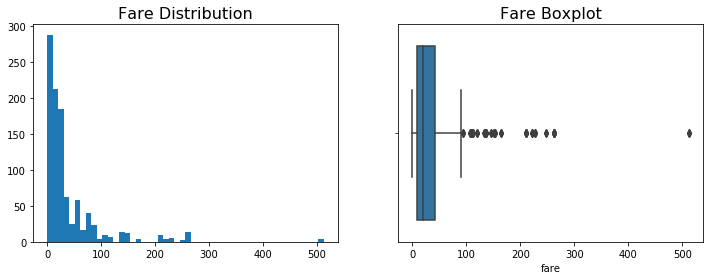

In [129]:
fare = data['fare']
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(x=fare, bins=50)
ax[0].set_title('Fare Distribution', fontsize=16)
ax[1] = sns.boxplot(fare, labels=['Fare'])
ax[1].set_title('Fare Boxplot', fontsize=16)
plt.show()

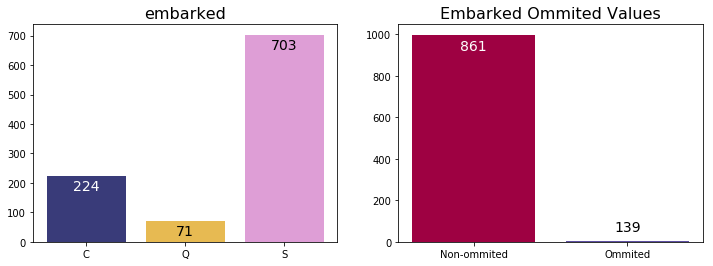

In [147]:
embarked_count = data.groupby('embarked')['survived'].count()
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(x =[str(i) for i in embarked_count.index],
        height = embarked_count.values,
        color = get_colors('tab20b', 3))
tcolor = ['white', 'black', 'black']
for i, val, c in zip(embarked_count.index, embarked_count.values, tcolor):
    ax[0].annotate(str(val),
                 xy = (i, val-50),
                 horizontalalignment = 'center',
                 fontsize = 14,
                 color = c)
ax[0].set_title("embarked", fontsize=16)

embarked_Na_notNA = [len(data[data['embarked'].notna()]), len(data[data['embarked'].isna()])]
ax[1].bar(x=['Non-ommited', 'Ommited'],
          height=embarked_Na_notNA,
          color=get_colors('Spectral', 2))
ax[1].annotate(str(len(age[age>0])), xy=(0, embarked_Na_notNA[0]-75), horizontalalignment='center', fontsize=14, color='white')
ax[1].annotate(str(1000-len(age[age>0])), xy=(1, embarked_Na_notNA[1]+50), horizontalalignment='center', fontsize=14)
ax[1].set_title("Embarked Ommited Values", fontsize=16)
plt.show()

In [107]:
np.linspace(0, 1, 3)

array([0. , 0.5, 1. ])